In [1]:
# Imports
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
# Dataset for Classification
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

print("Samples: ", len(x))

Samples:  569


In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# CrossValidation mit KFolds
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print(x_train.shape, x_test.shape)

# 2/3 von den 455 sind dann im train set und 1/3 von den 455 sind im validationset
kf = KFold(n_splits=3, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=4)

scores = cross_val_score(clf, x_train, y_train, cv=kf, n_jobs=-1)
predictions = cross_val_predict(clf, x_train, y_train, cv=kf, n_jobs=-1)
mean_score = round(np.mean(scores), 4)

print("Scores: ", scores)
print("Mean Score: ", mean_score)

(455, 30) (114, 30)
Scores:  [0.92763158 0.88157895 0.94039735]
Mean Score:  0.9165


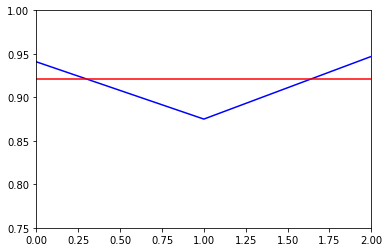

In [9]:
plt.plot(range(len(scores)), scores, color="blue")
plt.xlim(0, 2)
plt.ylim(0.75, 1)
plt.axhline(mean_score, linestyle="-", color="red")
plt.show()